In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *

from twinLab import *

In [2]:
parameters = pd.read_csv('parameters.csv')

In [3]:
#n_samples = parameters.shape[0]
#
#model_output = []
#
#for i in range(n_samples):
#    s = pd.read_csv('samples/sample_{}.csv'.format(i))[['temperature', 'desorption_rate']]
#    model_output.append(s)
#    
#grid_projection = Linear1dProjection()
#grid, samples_grid = grid_projection.transform(model_output)
#
#np.savetxt('grid.csv', grid)
#np.savetxt('samples_grid.csv', samples_grid)

In [4]:
grid = np.loadtxt('grid.csv')
samples_grid = np.loadtxt('samples_grid.csv')

In [5]:
#estimator = MultiOutputGPRegressor(GaussianProcessRegressor(kernel=RBF(length_scale_bounds=(0.1,10))), n_jobs=-1)
estimator = IndependentMultiGPModel(gpmodel=ZeroMeanExactGPModel, n_iter=100)
input_transformers = [StandardScaler()]
output_transformers = [MatrixScaler(), TruncatedSVD(8), StandardScaler()]

pipeline = Pipeline(estimator, input_transformers, output_transformers)

In [6]:
training_proportion = 0.8
n_train = int(training_proportion*4096)

indices = np.random.permutation(parameters.shape[0])
train_idx, test_idx = indices[:n_train], indices[n_train:]

x_train = parameters.values[train_idx,:]
y_train = samples_grid[train_idx,:]

x_test = parameters.values[test_idx,:]
y_test = samples_grid[test_idx,:]

pipeline.fit(x_train, y_train)


Training GP 1/8...
Iter 10/100 - Loss: 0.807   lengthscale: 1.219   noise: 0.340
Iter 20/100 - Loss: 0.332   lengthscale: 1.806   noise: 0.135
Iter 30/100 - Loss: -0.168   lengthscale: 2.238   noise: 0.049
Iter 40/100 - Loss: -0.663   lengthscale: 2.585   noise: 0.018
Iter 50/100 - Loss: -1.120   lengthscale: 2.916   noise: 0.007
Iter 60/100 - Loss: -1.489   lengthscale: 3.175   noise: 0.003
Iter 70/100 - Loss: -1.726   lengthscale: 3.404   noise: 0.002
Iter 80/100 - Loss: -1.862   lengthscale: 3.635   noise: 0.001
Iter 90/100 - Loss: -1.928   lengthscale: 3.718   noise: 0.001
Iter 100/100 - Loss: -1.969   lengthscale: 3.858   noise: 0.001

Training GP 2/8...
Iter 10/100 - Loss: 0.809   lengthscale: 1.214   noise: 0.340
Iter 20/100 - Loss: 0.330   lengthscale: 1.740   noise: 0.135
Iter 30/100 - Loss: -0.167   lengthscale: 2.127   noise: 0.049
Iter 40/100 - Loss: -0.649   lengthscale: 2.484   noise: 0.018
Iter 50/100 - Loss: -1.096   lengthscale: 2.748   noise: 0.007
Iter 60/100 - Loss

1825


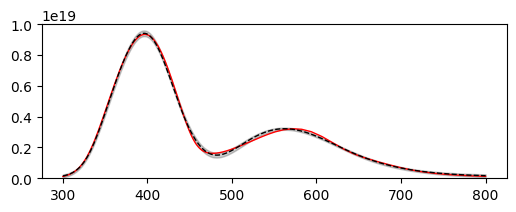

2429


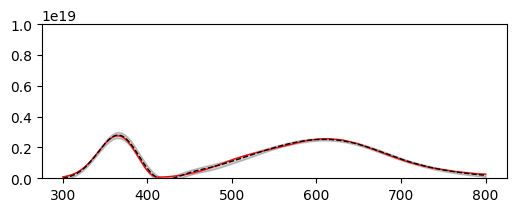

2453


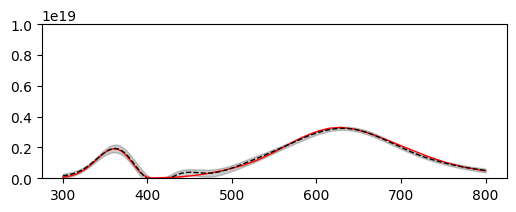

21


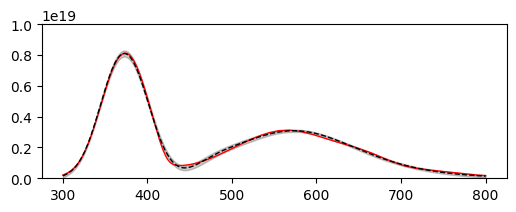

1253


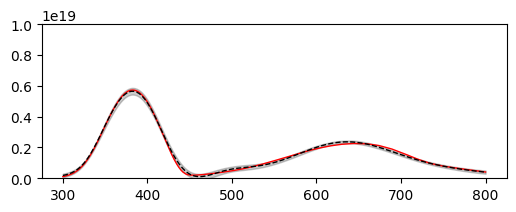

3226


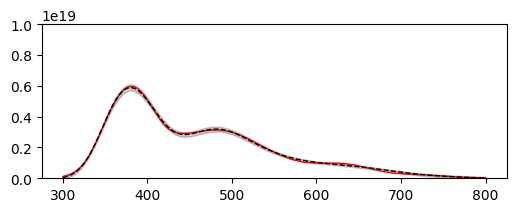

3016


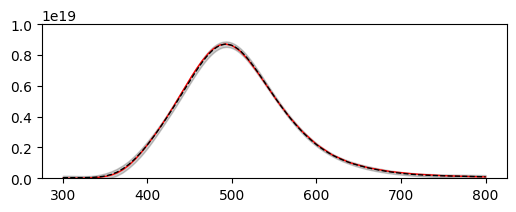

2743


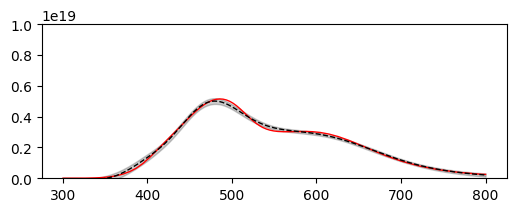

2435


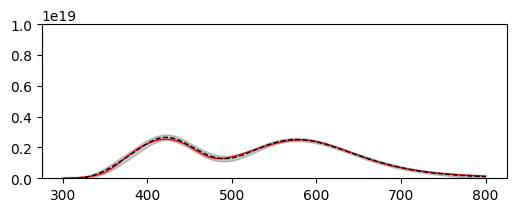

2061


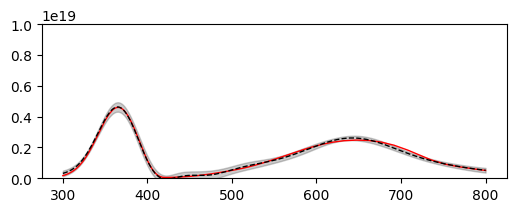

In [8]:
for i in range(10):
    
    idx = np.random.choice(test_idx)
    print(idx)
    
    plt.figure(figsize=(6,2))
    plt.plot(grid, samples_grid[idx,:], c='r', linewidth=1)
    
    mean, stdev = pipeline.predict(parameters.values[idx,:][np.newaxis,:])
    #mean, stdev = pipeline.predict(parameters_norm[idx,:][np.newaxis,:])
    plt.plot(grid, mean.flatten(), c='k', linewidth=1, linestyle='dashed')
    plt.fill_between(grid, mean.flatten()-1.96*stdev.flatten(), mean.flatten()+1.96*stdev.flatten(), alpha=0.2, color='k')
    plt.ylim(0, 1e19)
    
    #plt.savefig('plots/sample{}.pdf'.format(i), bbox_inches='tight')
    plt.show()

In [9]:
pipeline.save('pipeline.pickle')